In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from IPython.display import clear_output
import gym
import time
from utils import *

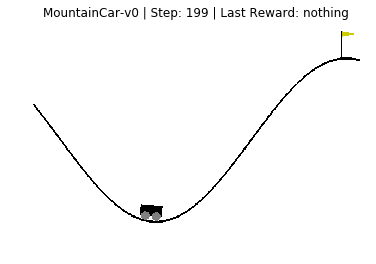

In [3]:
env = gym.make('MountainCar-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
for t in range(1000):
    # Render into buffer. 
    # You will still see the window.
    env.render(mode = 'rgb_array')
    
    show_state(env, t, "nothing")
    time.sleep(0.1)
    
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
clear_output(wait=True)